In [1]:
#load the data
import pandas as pd
import numpy as np
import sklearn

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc5742afbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc57428d410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc574f4ec50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc5742a0f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc5742d5cd0>],
 'means': []}

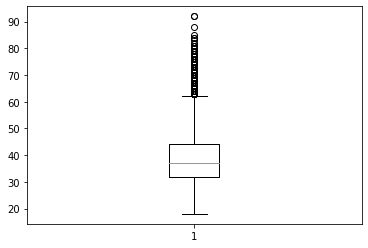

In [6]:
plt.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


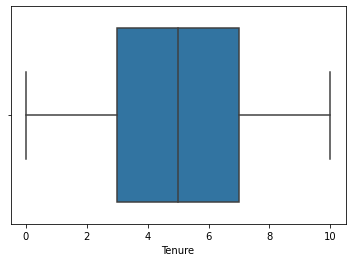

In [7]:
sns.boxplot(data['Tenure'])

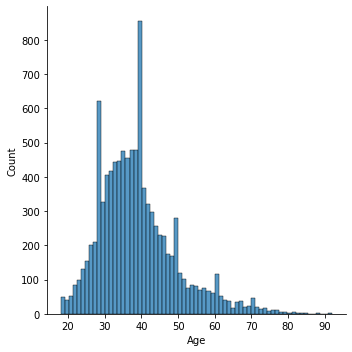

In [8]:
# Univariate Analysis
sns.displot(data['Age'])

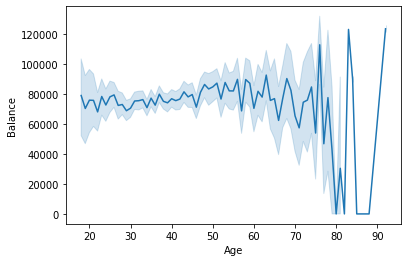

In [9]:
sns.lineplot(x="Age",y="Balance",data=data)

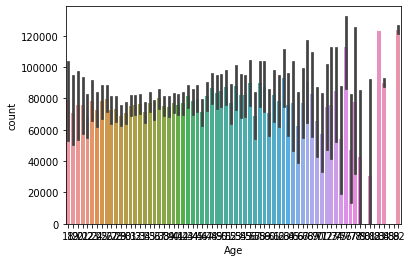

In [10]:
#Bi-Variate Analysis
sns.barplot(x='Age',y='Balance',data=data)
sns.countplot(x='Age',data=data)

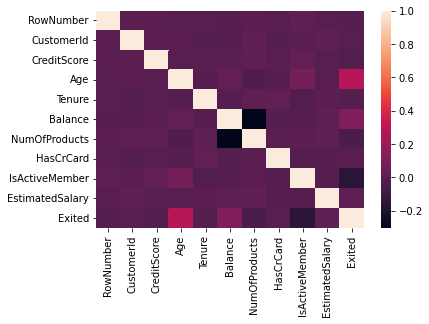

In [11]:
# multivariate analysis
corr_matrix=data.corr()
sns.heatmap(corr_matrix)

In [12]:
# Descriptive statistics
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
# outliers
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


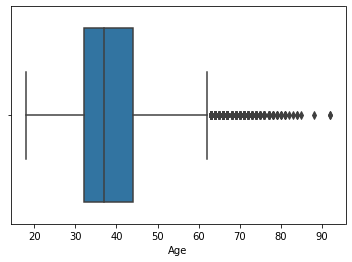

In [15]:
sns.boxplot(data['Age'])

In [16]:
# upper extreme =q3+1.5*IQR
#lower extreme=q1-1.5*IQR
# IQR=q3-q1
qnt=data.quantile(q=[0.25,0.75])

In [17]:
qnt

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [18]:
IQR =qnt.loc[0.75]-qnt.loc[0.25]

In [19]:
IQR

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [20]:
upper_extreme=qnt.loc[0.75]+1.5*IQR

In [21]:
upper_extreme

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [22]:
lower_extreme=qnt.loc[0.25]-1.5*IQR

In [23]:
lower_extreme

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imp =SimpleImputer(missing_values=np.nan,strategy='main')

In [26]:
data[data['Age']>88]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,6444,15764927,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,6760,15660878,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


In [27]:
data[data['Age']>92]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [28]:
# replacing outlier with mean
data['Age']=np.where(data['Age']>88,data['Age'].mean(),data['Age'])

In [29]:
data[data['Age']>88]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [30]:
# Encoding
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
data['Surname']=le.fit_transform(data['Surname'])

In [33]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [34]:
# separate the dependent and independent variables
y=data['Exited']
x=data.drop(columns=['Exited'],axis=1)

In [35]:
names=x.columns

In [36]:
names

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [37]:
# scale the independent variable
from sklearn.preprocessing import scale

In [38]:
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,France,Female,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,France,Female,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,France,Female,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,France,Male,39.0,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,France,Male,35.0,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,France,Female,36.0,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52


In [39]:
x=pd.DataFrame(x,columns=names)

In [40]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,France,Female,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,France,Female,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,France,Female,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10


In [41]:
# split the data into training and testing
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [43]:
x_train.shape

(8000, 13)

In [44]:
x_test.shape

(2000, 13)